# Word 2 Vec Results

The following notebook walks you through viewing and analyzing word embeddings derived from data a word2vec model created using the "word2VecData" notebook which is part of this text analysis repository. Word2Vec is a Word Embedding Model (WEM) and helps to find how specific words are used in a given text. This notebook results in creating a table of words which are most similar to a word of interest.

###  Before we begin
Before we start, you will need to have set up a [Carbonate account](https://kb.iu.edu/d/aolp) in order to access [Research Desktop (RED)](https://kb.iu.edu/d/apum). You will also need to have access to RED through the [thinlinc client](https://kb.iu.edu/d/aput). If you have not done any of this, or have only done some of this, but not all, you should go to our [textPrep-Py.ipynb](https://github.com/cyberdh/Text-Analysis/blob/drafts/textPrep-Py.ipynb) before you proceed further. The textPrepPy notebook provides information and resources on how to get a Carbonate account, how to set up RED, and how to get started using the Jupyter Notebook on RED. 

### Run CyberDH environment
The code in the cell below points to a Python environment specificaly for use with the Python Jupyter Notebooks created by Cyberinfrastructure for Digital Humanities. It allows for the use of the different pakcages in our notebooks and their subsequent data sets.

##### Packages
- **sys:** Provides access to some variables used or maintained by the interpreter and to functions that interact strongly with the interpreter. It is always available.
- **os:** Provides a portable way of using operating system dependent functionality.

#### NOTE: This cell is only for use with Research Desktop. You will get an error if you try to run this cell on your personal device!!

In [1]:
import sys
import os
sys.path.insert(0,"/N/u/cyberdh/Carbonate/dhPyEnviron/lib/python3.6/site-packages")
os.environ["NLTK_DATA"] = "/N/u/cyberdh/Carbonate/dhPyEnviron/nltk_data"

### Include necessary packages for notebook 

Python's extensibility comes in large part from packages. Packages are groups of functions, data, and algorithms that allow users to easily carry out processes without recreating the wheel. Some packages are included in the basic installation of Python, others created by Python users are available for download. Make sure to have the following packages installed before beginning so that they can be accessed while running the scripts.

In your terminal, packages can be installed by typing `pip install nameofpackage --user`. However, since you are using ReD and our Python environment, you will not need to install any of the packages below to use this notebook. Anytime you need to make use of a package, however, you need to import it so that Python knows to look in these packages for any functions or commands you use. Below is a brief description of the packages we are using in this notebook:
 
- **pandas:** An open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
- **gensim:** Python library for topic modelling, document indexing and similarity retrieval with large corpora.
- **wordcloud:** A simple wordcloud generator in Python.
- **matplotlib:** A Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

Notice we import some of the packages differently. In some cases we just import the entire package when we say `import XYZ`. For some packages which are small, or, from which we are going to use a lot of the functionality it provides, this is fine. 

Sometimes when we import the package directly we say `import XYZ as X`. All this does is allow us to type `X` instead of `XYZ` when we use certain functions from the package. So we can now say `X.function()` instead of `XYZ.function()`. This saves time typing and eliminates errors from having to type out longer package names. I could just as easily type `import XYZ as potato` and whenever I use a function from the `XYZ` package I would need to type `potato.function()`. What we import the package as is up to you, but some commonly used packages have abbreviations that are standard amongst Python users such as `import pandas as pd` or `import matplotlib.pyplot as plt`. You do not need to use `pd` or `plt`, however, these are widely used and using something else could confuse other users and is generally considered bad practice. 

Other times we import only specific elements or functions from a package. This is common with packages that are very large and provide a lot of functionality, but from which we are only using a couple functions or a specific subset of the package that contains the functionality we need. This is seen when we say `from XYZ import ABC`. This is saying I only want the `ABC` function from the `XYZ` package. Sometimes we need to point to the specific location where a function is located within the package. We do this by adding periods in between the directory names, so it would look like `from XYZ.123.A1B2 import LMN`. This says we want the `LMN` function which is located in the `XYZ` package and then the `123` and `A1B2` directory in that package. 

You can also import more than one function from a package by separating the functions with commas like this `from XYZ import ABC, LMN, QRS`. This imports the `ABC`, `LMN` and `QRS` functions from the `XYZ` package.

In [2]:
import pandas as pd
from gensim.models import Word2Vec
import wordcloud
import matplotlib.pyplot as plt

#### File paths
Here we are saving as variables different file paths that we need in our code. We do this so that they are easier to call later and so that you can make most of your changes now and not need to make as many changes later. 

First we use the `os` package above to find our `[HOME]` directory using the `environ` function. This will work for any operating system, so if you decide to try this out on your personal computer instead of ReD, the `homePath` variable will still be the path to your "home" directory, so no changes are needed.

Next we add the `homePath` variable to other folder names that lead to the word2vec model file we want to load. Be sure the name of your model matches the last word(s) in quotes listed in the path as this is where the name of the word2vec model file is contained. We save this file path as the variable `cleanModel`.

Finally, we combine the file path assigned to the `homePath` variable with another file path that leads to a folder where we will save our output .csv file at the end of the notebook.

In [3]:
homePath = os.environ["HOME"]
cleanModel = os.path.join(homePath, "Text-Analysis-master", "TopicModeling", "Word2Vec", "cleanedData", "wordvecModel")
dataResults = os.path.join(homePath, "Text-Analysis-master", "Output")

### Load the word2vec model

This line of code loads our word2vec model using the file path assigned to the `cleanModel` variable above. We assign our loaded word2vec model to the variable `model`.

In [4]:
model = Word2Vec.load(cleanModel)

### Let's find some word relationships
First, we can compare two words to each other to see how similar they are. Just change the words assigned to the variables `ws1` and `ws2` to the two words you want to compare.

In [6]:
ws1="hamlet"
ws2="madness"
wordSim = model.wv.similarity(ws1, ws2)
print("Cosine similarity score between {} and {} is {}".format(ws1, ws2, wordSim))

Cosine similarity score between hamlet and madness is 0.44737157225608826


Now we can look at words most similar to a single word, or most similar to a combination of words.

First, we have assigned the name of the output .csv file to the variable `w2vCSVfile`. You may wish to change the name of the file to better match your data.

Now we choose a word (or words) of interest and see what other words are most similar with that word in the text. Change the word in quotes after `w1` to change the word. You may also want to change the `topn` value as this determines how many of the top words you will get in the .csv file output. You can also do the famous analogy of "man is to king as woman is to..." and hopefully get queen. You do this by changing the `wtv = model.wv.most_similar(positive=[w1], topn = topn)` line to `wtv = model.wv.most_similar(positive=[w2,w3], negative[w4], topn = topn)` which now takes the vectors of king and woman and subtracts the vector for man, which should leave us with queen. However, if any of these words do not appear often enough (or at all) in the text, then these examples will not work.

The ouput you see shows the top ten words ranked by similarity to `w1`. This is because what `Word2Vec` does is turn each word into a vector and then run cosine similarity on the vectors when two words are compared. The numbers you see are the cosine similarity scores of our word of interest with the corresponding word in the table. They are listed from highest to lowest (most similar to least).

In [5]:
w2vCSVfile = 'word2vec.csv'
w1 = "lord"
w2 = "woman"
w3 = "king"
w4 = "man"
topn = 200

wtv = model.wv.most_similar(positive=[w1], topn = topn)
df = pd.DataFrame(wtv, columns = ["Words", "Cosine Scores"])
df.to_csv(os.path.join(dataResults, w2vCSVfile))
df.head(10)

,Words,Cosine Scores
0,tell,0.535632
1,faith,0.495085
2,right,0.470994
3,god,0.469924
4,daughter,0.467877
5,king,0.457197
6,denmark,0.452673
7,marry,0.442595
8,fellow,0.437132
9,mean,0.436936


### Plot a wordcloud of most associated words

This wordcloud shows the words most associated with our word of choice above.

First we choose the maximum number of words we want in our wordcloud by assigning the number to the variable `maxWrdCnt`.

Then we choose a background color and assign it the variable `bgColor`. 

Next we choose the color of the words in the wordcloud and assign it to the variable `color`. The current color is from the RColorBrewer palette of colors. You can find other color options [here](https://www.nceas.ucsb.edu/~frazier/RSpatialGuides/colorPaletteCheatsheet.pdf). Just put the name of the color selection you want in quotes.

Next we choose the minimum font size for the words in the wordcloud and assign the font size to the variable `minFont`.

Now we decide the width and height of the output image and assign those integers to the `width` and `height` variables. This mixed with the `FigureSz` variable (discussed below) help produce a sharper and crisper looking result, so feel free to play with these numbers.

Now we choose the figure size. The first number is the width and the second number is the height. Feel free to make changes as needed. We assign the figure size to the variable `FigureSz`.

Then we name the output '.png' file our wordcloud will be saved as and assign it to the variable `wcOutputFile`. 

Next we determine the format of the output file. We already named our file above with a '.png' file type. So we need to make sure this matches that file type. We assign the format to the variable `imgFmt`.

Then we choose the resolution of our output image by assigning the dpi resolution we want to the variable `dpi`.

Then we create an additional list of stopwords that will remove problematic words so you do not have to go back to the word2VecData notebook and add the stopword there and re-run everything. Then we remove the row containing the word(s) from the dataframe.

Now we set our "Words" column in our dataframe as the index and change the "Words" column to a string type object. These are requirements of the wordcloud package in order to be able to produce a wordcloud from out dataframe.

Next we give parameters for our wordcloud and save them as `wc`. Any changes to these lines of code were already decided in the variable at the beginning of the cell.

Then are the statements for how the wordcloud is displayed. We already chose the figure size above, so we can leave `plt.figure(figsize = figureSz)` alone.  Then we want it to look like what we described in our `wc` variable which is what the `plt.imshow(wc, interpolation = 'bilinear')` statement does. Then we need to state that we are not using an x or y axis by using the `plt.axis("off")` statement. Next we want the layout to be tight instead of spread out so we use the `plt.tight_layout()` statement. Then we state arguments for how we want the wordcloud saved to file (`plt.savefig(os.path.join(dataResults, wcOutputFile), format = imgFmt, dpi = dpi, bbox_inches = 'tight')`), and finally that we want to see the final result displayed in the notebook which is what `plt.show()` does.

Run the code and generate your word2vec wordcloud!!

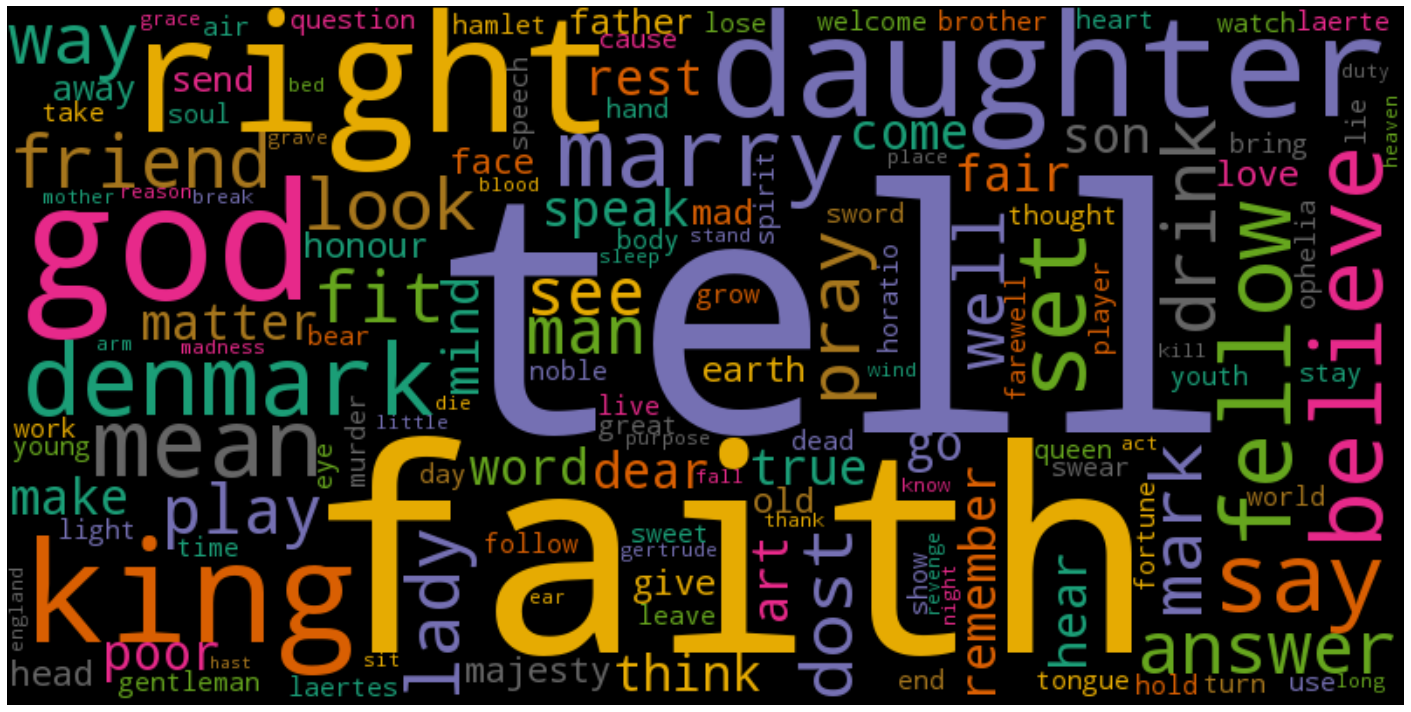

In [7]:
# Variables
maxWrdCnt = 500
bgColor = "black"
color = "Dark2"
minFont = 10
width = 800
height = 400
figureSz = (20,10)
wcOutputFile = "word2vecWordCloud.png"
imgFmt = "png"
dpi = 600

df.set_index(df["Words"],inplace = True)
df['Words'] = df['Words'].astype(str)

# Additional Stopwords
stopwords = []
text = df[~df['Words'].isin(stopwords)]

# Wordcloud aesthetics

wc = wordcloud.WordCloud(background_color = bgColor, width = width, height = height, max_words = maxWrdCnt, colormap = color, min_font_size = minFont).generate_from_frequencies(text['Cosine Scores'])

# show
plt.figure(figsize = figureSz)
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.tight_layout()
    
# save graph as an image to file
plt.savefig(os.path.join(dataResults, wcOutputFile), format = imgFmt, dpi = dpi, bbox_inches = 'tight')
    
plt.show()

## VOILA!!

This code was adapted from Kavita Ganesan at [http://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.XFnQmc9KjUI](http://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.XFnQmc9KjUI). Accessed 02/05/2019.